In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score, roc_curve
import warnings
warnings.simplefilter('ignore')

# data exploration and information gathering

In [2]:
dataset = pd.read_csv('/kaggle/input/bank-marketing-uci/bank.csv',sep =';')


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
dataset.isnull().sum() # checking whether we have null values or not

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


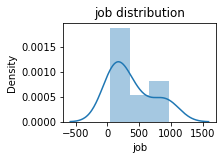

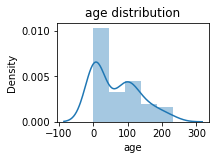

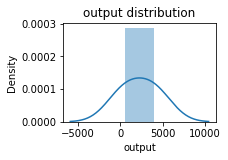

In [6]:

#create chart in each subplot

plt.subplot(2,2,1)

sns.distplot(dataset.job.value_counts())
plt.xlabel('job')
plt.title('job distribution')
plt.show()

plt.subplot(2,2,2)
sns.distplot(dataset.age.value_counts())
plt.xlabel('age')
plt.title('age distribution')
plt.show()

plt.subplot(2,2,3)
sns.distplot(dataset.y.value_counts())
plt.xlabel('output')
plt.title('output distribution')
plt.show()

In [7]:
# separating categorical data from numerical data 

categorical = dataset.iloc[:,[1,2,3,4,6,7,8,10,15,16]]   

le = LabelEncoder()  # i don't wanted my columns to be get expanded so i used label encoder instead of onehotencoder,
                     # also most of my columns were non binary type.

val = [0,1,2,3,4,5,6,7,8,9] 


for i in val:
    categorical.iloc[:,i] = le.fit_transform(categorical.iloc[:,i])



In [8]:
dataset = dataset.drop(dataset.iloc[:,[1,2,3,4,6,7,8,10,15,16]],axis =1) # dropping the colums which are encoded 
dataset_new = pd.concat((dataset,categorical),axis =1)

In [9]:
x = dataset_new.iloc[:,:-1]    # dividing into independent and dependent features
y = dataset_new['y']

In [10]:
y.value_counts()

0    4000
1     521
Name: y, dtype: int64

# scaling 

In [11]:
# scaling the independent features using standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x['balance'] = sc.fit_transform(np.array(x['balance']).reshape(-1,1))
x['duration'] = sc.fit_transform(np.array(x['duration']).reshape(-1,1))
x['pdays'] = sc.fit_transform(np.array(x['pdays']).reshape(-1,1))
x['campaign'] = sc.fit_transform(np.array(x['campaign']).reshape(-1,1))
x['previous'] = sc.fit_transform(np.array(x['previous']).reshape(-1,1))




In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15)


x_train.shape,y_train.shape

((3842, 16), (3842,))

# random forest classifier

In [13]:
# using random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfclass = RandomForestClassifier()
rfclass.fit(x_train,y_train)
rf_prediction = rfclass.predict(x_test)

In [14]:
# accuracy without using feature selection

score = accuracy_score(y_test,rf_prediction)

print('random forest score',score)

print('confusion matrix \n',confusion_matrix(y_test,rf_prediction))
print('precission',precision_score(y_test,rf_prediction))
print('recall',recall_score(y_test,rf_prediction))
print('f1 score' ,f1_score(y_test,rf_prediction))
print('roc auc score ',roc_auc_score(y_test,rf_prediction))

random forest score 0.8910162002945509
confusion matrix 
 [[588  17]
 [ 57  17]]
precission 0.5
recall 0.22972972972972974
f1 score 0.3148148148148148
roc auc score  0.6008152780880054


# training only with selected features

Feature: 0, Score: 0.10086
Feature: 1, Score: 0.10917
Feature: 2, Score: 0.09263
Feature: 3, Score: 0.29550
Feature: 4, Score: 0.03960
Feature: 5, Score: 0.05275
Feature: 6, Score: 0.02942
Feature: 7, Score: 0.05086
Feature: 8, Score: 0.02349
Feature: 9, Score: 0.02861
Feature: 10, Score: 0.00265
Feature: 11, Score: 0.01986
Feature: 12, Score: 0.00994
Feature: 13, Score: 0.01866
Feature: 14, Score: 0.08104
Feature: 15, Score: 0.04495


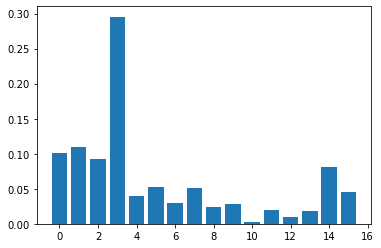

In [15]:
# checking feature importance of model

importance = rfclass.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [16]:
# traing model on the features which are having high contribution in accuracy 

x_new = x.iloc[:,[0,1,2,3,5,7,14,15]]
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.15)

rf_new = RandomForestClassifier()
rf_new.fit(x_train,y_train)

prediction = rf_new.predict(x_test)
score = accuracy_score(y_test,prediction)
print('random forest feature selected score ',score)  # we can clearly see that by using feature selection our accuracy got increased

random forest feature selected score  0.8998527245949927


In [17]:
print('confusion matrix \n',confusion_matrix(y_test,prediction))
print('precission',precision_score(y_test,prediction))
print('recall',recall_score(y_test,prediction))
print('f1 score' ,f1_score(y_test,prediction))
print('roc auc score ',roc_auc_score(y_test,prediction))

confusion matrix 
 [[586  13]
 [ 55  25]]
precission 0.6578947368421053
recall 0.3125
f1 score 0.42372881355932207
roc auc score  0.6453985809682804


# cross validation using randomized search cv to overcome overfitting

In [18]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

CPU times: user 281 µs, sys: 78 µs, total: 359 µs
Wall time: 337 µs


In [19]:
rf_random = RandomizedSearchCV(estimator = rfclass, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [20]:
%%time
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 498 ms, sys: 58.2 ms, total: 556 ms
Wall time: 3.89 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 18, 26, 34, 42, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 46, 73, 100]},
                   random_state=42, verbose=2)

In [21]:
rf_random.best_params_

{'n_estimators': 73,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [22]:
random= RandomForestClassifier(n_estimators = 100,min_samples_split= 2,min_samples_leaf= 1,max_features= 'auto',max_depth= 15,bootstrap= True)
random.fit(x_train,y_train)

RandomForestClassifier(max_depth=15)

In [23]:
pred = random.predict(x_test)
score = accuracy_score(y_test,pred)
print('cross val accuracy score',score)

print('confusion matrix \n',confusion_matrix(y_test,pred))
print('precission',precision_score(y_test,pred))
print('recall',recall_score(y_test,pred))
print('f1 score' ,f1_score(y_test,pred))
print('roc auc score ',roc_auc_score(y_test,pred))

cross val accuracy score 0.9101620029455081
confusion matrix 
 [[587  12]
 [ 49  31]]
precission 0.7209302325581395
recall 0.3875
f1 score 0.5040650406504065
roc auc score  0.6837333055091819


# logistic regression 

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='ovr', n_jobs=None, penalty='l2',  
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,  
                   warm_start=False)
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
score = accuracy_score(y_test,lr_predict)
print('accuracy score',score)

print('confusion matrix \n',confusion_matrix(y_test,lr_predict))
print('precission',precision_score(y_test,lr_predict))
print('recall',recall_score(y_test,lr_predict))
print('f1 score' ,f1_score(y_test,lr_predict))
print('roc auc score ',roc_auc_score(y_test,lr_predict))


accuracy score 0.8924889543446245
confusion matrix 
 [[594   5]
 [ 68  12]]
precission 0.7058823529411765
recall 0.15
f1 score 0.24742268041237112
roc auc score  0.5708263772954926


# gradient boosting classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25,max_depth=10, random_state=0).fit(x_train, y_train)
gb_predict = clf.predict(x_test)
score = accuracy_score(y_test,gb_predict)
print('accuracy score' ,score)

print('confusion matrix \n',confusion_matrix(y_test,gb_predict))
print('precission',precision_score(y_test,gb_predict))
print('recall',recall_score(y_test,gb_predict))
print('f1 score' ,f1_score(y_test,gb_predict))
print('roc auc score ',roc_auc_score(y_test,gb_predict))


accuracy score 0.8939617083946981
confusion matrix 
 [[575  24]
 [ 48  32]]
precission 0.5714285714285714
recall 0.4
f1 score 0.47058823529411764
roc auc score  0.6799666110183639
